# WMAZE Model 5 Version 2.3.2
## LSS Model
## Removes last 3 noisy volumes (FSL ROI)

In [1]:
%matplotlib inline
import os
from os.path import join
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from glob import glob
from pylab import *

# Learning curve and derivative
### Visually demonstrates which potential target trials are affected by window-related index slicing

Subject WMAZE_020
Stimulus set1



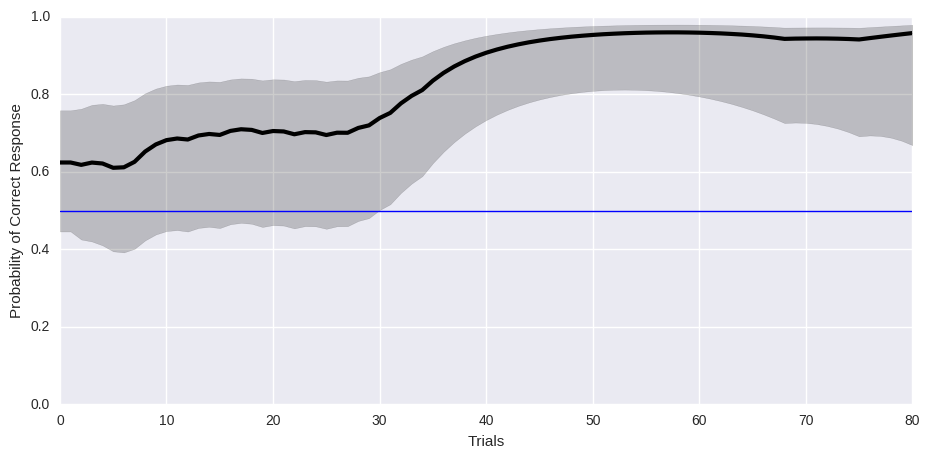

Subject WMAZE_020
Stimulus set2



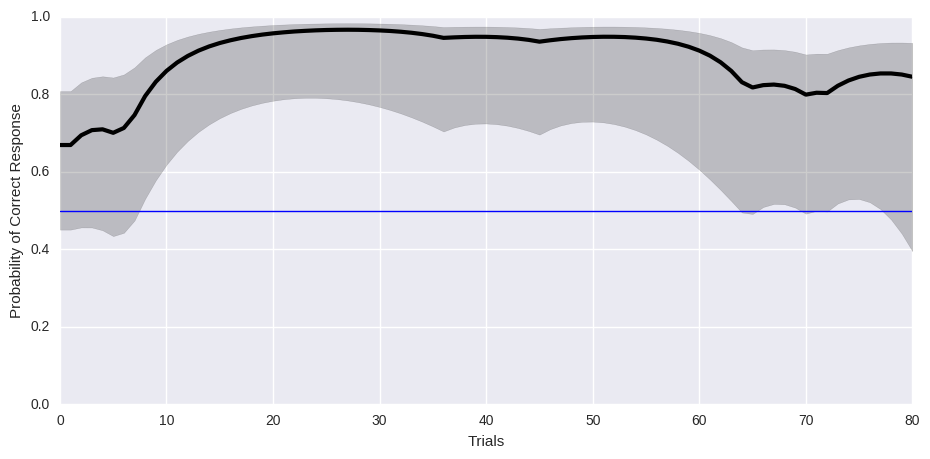

Subject WMAZE_020
Stimulus set3



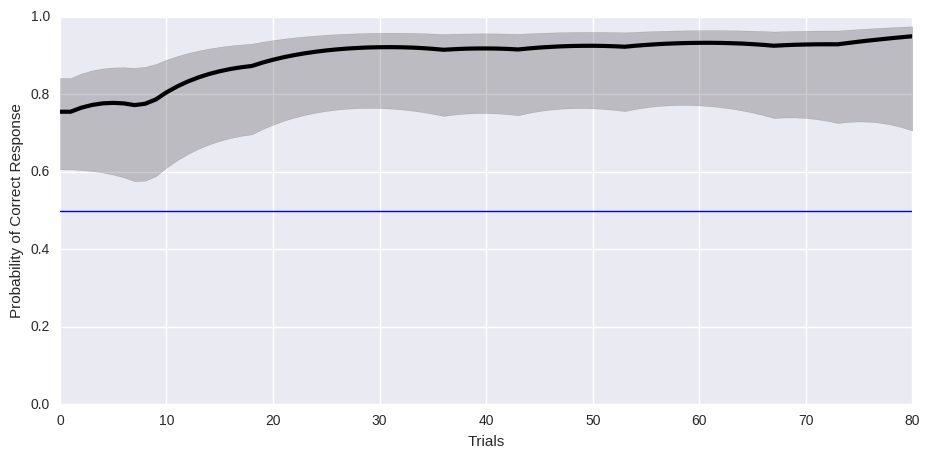

In [7]:
import seaborn as sns
#sns.set_style("ticks")
sns.set_palette('muted')
import matplotlib.pyplot as plt


subs = ['WMAZE_020']
'''
subs = ['WMAZE_001', 'WMAZE_002', 'WMAZE_004', 'WMAZE_005', 'WMAZE_006',
        'WMAZE_007', 'WMAZE_008', 'WMAZE_009', 'WMAZE_010', 'WMAZE_012',
        'WMAZE_017', 'WMAZE_018', 'WMAZE_019', 'WMAZE_020', 'WMAZE_021',
        'WMAZE_022', 'WMAZE_023', 'WMAZE_024', 'WMAZE_026', 'WMAZE_027']
'''
sets = ['set1', 'set2', 'set3']


for sub in subs:
    sub_dir = '/home/data/madlab/data/mri/wmaze/scanner_behav/{0}/'.format(sub)
    #new derivative files combining behavioral runs into set
    frst_deriv_files = glob(join(sub_dir, 'Bprime_pmode_set*.txt'))    
    frst_deriv_files.sort()
    upper_95_files = glob(join(sub_dir, 'B_p95_set*.txt'))
    upper_95_files.sort()
    lower_05_files = glob(join(sub_dir, 'B_p05_set*.txt'))
    lower_05_files.sort()
    #new learning files combining behavioral runs into set
    learning_files = glob(join(sub_dir, 'B_pmode_set*')) 
    learning_files.sort()
    #print learning_curves
    #print frst_deriv_files
    
    for i, curr_set in enumerate(sets):  
        deriv_file = np.loadtxt(frst_deriv_files[i])
        learning_curve = np.loadtxt(learning_files[i])
        upper_95 =np.loadtxt(upper_95_files[i])
        lower_05 =np.loadtxt(lower_05_files[i])
        #print len(learning_curve)
        z_transform = stats.zscore(learning_curve)
        #print 'Learning Curve', learning_curve
        #print 'Z Transform', z_transform
        
        #plt.plot(deriv_file) #before shaving
        #alt_deriv_file = deriv_file[10:-10]
        #alt_learning_curve = learning_curve[10:-10]
        #alt_upper_95 = upper_95[10:-10]
        #print alt_deriv_file 
        #plt.plot(alt_deriv_file) #after shaving
        target_trial = np.argmax(deriv_file)
        #grabs the index of the largest derivative
        #alt_target_trial = np.argmax(alt_deriv_file)+10
        #print target_trial
        #plt.plot(learning_curve)
        
        x = range(len(learning_curve))
        #x1 = range(len(alt_learning_curve))
        chance = np.ones(len(x)) * 0.5
        #chance1 = np.ones(len(x1)) * 0.5
        

        fig, ax0 = plt.subplots(figsize=(11, 5))  
        ax0.plot(x, learning_curve, "black", linewidth = 3)
        ax0.plot(x, chance, 'b', linewidth = 1)
        ax0.fill_between(x, learning_curve, upper_95, color = "black", alpha = 0.2)
        ax0.fill_between(x, learning_curve, lower_05, color = "black", alpha = 0.2)
        #ax0.plot(x, deriv_file, "#00CCCC", linewidth = 3)
        ax0.set_ylim(0,1)
        ax0.set_xlabel('Trials')
        ax0.set_ylabel('Probability of Correct Response')

        
        print 'Subject ' + sub
        print 'Stimulus ' + curr_set

        print ""
        
        plt.show()


In [ ]:
import seaborn as sns
#sns.set_style("ticks")
sns.set_palette('muted')
import matplotlib.pyplot as plt


#subs = ['WMAZE_001', 'WMAZE_002', 'WMAZE_004']

subs = ['WMAZE_001', 'WMAZE_002', 'WMAZE_004', 'WMAZE_005', 'WMAZE_006',
        'WMAZE_007', 'WMAZE_008', 'WMAZE_009', 'WMAZE_010', 'WMAZE_012',
        'WMAZE_017', 'WMAZE_018', 'WMAZE_019', 'WMAZE_020', 'WMAZE_021',
        'WMAZE_022', 'WMAZE_023', 'WMAZE_024', 'WMAZE_026', 'WMAZE_027']

sets = ['set1', 'set2', 'set3']

data_dict = {"subj_ID":[], "set_1":[], "set_2":[], "set_3":[],
             "zset_1":[], "zset_2":[], "zset_3":[], 
             "avg_lcurve":[], "avg_zcurve":[]}

print "---------------------------------WITHIN-SUBJECT---------------------------------"

for i, sub in enumerate(subs):
    data_dict["subj_ID"].append(sub)
    sub_dir = '/home/data/madlab/data/mri/wmaze/scanner_behav/{0}/'.format(sub)
    #new derivative files combining behavioral runs into set
    frst_deriv_files = glob(join(sub_dir, 'Bprime_pmode_set*.txt'))    
    frst_deriv_files.sort()
    upper_95_files = glob(join(sub_dir, 'B_p95_set*.txt'))
    upper_95_files.sort()
    #new learning files combining behavioral runs into set
    learning_files = glob(join(sub_dir, 'B_pmode_set*')) 
    learning_files.sort()
    #print learning_curves
    #print frst_deriv_files
    
    for j, curr_set in enumerate(sets):  
        deriv_file = np.loadtxt(frst_deriv_files[j])
        learning_curve = np.loadtxt(learning_files[j])
        upper_95 = np.loadtxt(upper_95_files[j])
        z_transform = stats.zscore(learning_curve)
        #print 'Learning Curve', learning_curve
        #print 'Z Transform', z_transform
        data_dict["set_{0}".format(j+1)].append(learning_curve)
        data_dict["zset_{0}".format(j+1)].append(z_transform)
        
    subj_zavg = []
    subj_lavg = []
    for k, curr_trial in enumerate(data_dict["zset_1"][0]):
        #print data_dict["set_1"][0][i]
        ztrial_avg = (data_dict["zset_1"][0][k] + data_dict["zset_2"][0][k] + data_dict["zset_3"][0][k])/3
        ltrial_avg = (data_dict["set_1"][0][k] + data_dict["set_2"][0][k] + data_dict["set_3"][0][k])/3
        subj_zavg.append(ztrial_avg)
        subj_lavg.append(ltrial_avg)
    #print subj_zavg
    data_dict["avg_zcurve"].append(subj_zavg)
    data_dict["avg_lcurve"].append(subj_lavg)
    x = range(81)
    chance = np.ones(len(x)) * 0.5
    
    fig, (ax0, ax1) = plt.subplots(ncols = 2, figsize=(11, 5))  
    ax0.plot(x, data_dict["set_1"][i], "p", linewidth = 2)
    ax0.plot(x, data_dict["set_2"][i], "p", linewidth = 2)
    ax0.plot(x, data_dict["set_3"][i], "p", linewidth = 2)
    ax0.plot(x, data_dict["avg_lcurve"][i], "black", linewidth = 4)
    ax0.set_ylim(0,1)
    ax0.set_title("Learning Curve")
    ax0.set_xlabel('Trials')
    ax0.set_ylabel('Probability of Correct Response')
    
    ax1.plot(x, data_dict["zset_1"][i], "p", linewidth = 2)
    ax1.plot(x, data_dict["zset_2"][i], "p", linewidth = 2)
    ax1.plot(x, data_dict["zset_3"][i], "p", linewidth = 2)
    ax1.plot(x, data_dict["avg_zcurve"][i], "black", linewidth = 4)
    ax1.set_title("Z Score Curve")
    ax1.set_xlabel('Trials')
    ax1.set_ylabel('Probability of Correct Response')
    
    print ""
    print 'Subject ' + sub
    print "Set 1 = BLUE"
    print "Set 2 = GREEN"
    print "Set 3 = RED"
    
    print "LC Set 2 vs Set 1: ", stats.ttest_rel(data_dict["set_2"][i], data_dict["set_1"][i])
    print "LC Set 3 vs Set 1: ", stats.ttest_rel(data_dict["set_3"][i], data_dict["set_1"][i])
    print "LC Set 3 vs Set 2: ", stats.ttest_rel(data_dict["set_3"][i], data_dict["set_2"][i])
    print "Bonferroni Corrected = 0.0167"
    plt.show()
      
print "---------------------------------BETWEEN_SUBJECTS---------------------------------"

x = range(81)
chance = np.ones(len(x)) * 0.5

final_lcurve = []
lcurve = []
final_zcurve = []
zcurve = []
for l, curr_sub in enumerate(data_dict["subj_ID"]):
    subj_lcurve = []
    subj_zcurve = []
    for m, curr_trial in enumerate(data_dict["set_1"][0]):
        tot_ztrial_avg = (data_dict["zset_1"][l][m] + data_dict["zset_2"][l][m] + data_dict["zset_3"][l][m])/3
        tot_ltrial_avg = (data_dict["set_1"][l][m] + data_dict["set_2"][l][m] + data_dict["set_3"][l][m])/3
        subj_lcurve.append(tot_ltrial_avg)
        subj_zcurve.append(tot_ztrial_avg)
    final_lcurve.append(subj_lcurve)
    final_zcurve.append(subj_zcurve)
    
for n, curr_pos in enumerate(final_lcurve[0]):
    tot_l_avg = (final_lcurve[0][n] + final_lcurve[1][n] + final_lcurve[2][n])/3
    tot_z_avg = (final_zcurve[0][n] + final_zcurve[1][n] + final_zcurve[2][n])/3
    lcurve.append(tot_l_avg)
    zcurve.append(tot_z_avg)
    
x = range(81)
chance = np.ones(len(x)) * 0.5

fig, (ax0, ax1) = plt.subplots(ncols = 2, figsize=(11, 5))  
ax0.plot(x, lcurve, "p", linewidth = 2)
ax0.set_ylim(0,1)
ax0.set_title("Learning Curve")
ax0.set_xlabel('Trials')
ax0.set_ylabel('Probability of Correct Response')

ax1.plot(x, zcurve, "p", linewidth = 2)
ax1.set_title("Z Score Curve")
ax1.set_xlabel('Trials')
ax1.set_ylabel('Probability of Correct Response')

plt.show()

In [ ]:
import seaborn as sns
#sns.set_style("ticks")
sns.set_palette('muted')
import matplotlib.pyplot as plt


#subs = ['WMAZE_001']

subs = ['WMAZE_001', 'WMAZE_002', 'WMAZE_004', 'WMAZE_005', 'WMAZE_006',
        'WMAZE_007', 'WMAZE_008', 'WMAZE_009', 'WMAZE_010', 'WMAZE_012',
        'WMAZE_017', 'WMAZE_018', 'WMAZE_019', 'WMAZE_020', 'WMAZE_021',
        'WMAZE_022', 'WMAZE_023', 'WMAZE_024', 'WMAZE_026', 'WMAZE_027']

sets = ['set1', 'set2', 'set3']

B_Bprime = []
B_pmodes = []
B_p05s = []
B_p95s = []


for sub in subs:
    sub_dir = '/home/data/madlab/data/mri/wmaze/scanner_behav/{0}/'.format(sub)
    #new derivative files combining behavioral runs into set
    frst_deriv_files = glob(join(sub_dir, 'Bprime_pmode_set*.txt'))    
    frst_deriv_files.sort()
    upper_95_files = glob(join(sub_dir, 'B_p95_set*.txt'))
    upper_95_files.sort()
    lower_05_files = glob(join(sub_dir, 'B_p05_set*.txt'))
    lower_05_files.sort()
    learning_files = glob(join(sub_dir, 'B_pmode_set*')) 
    learning_files.sort()
    
    for i, curr_set in enumerate(sets):  
        B_Bprime.append(np.loadtxt(frst_deriv_files[i]))
        B_pmodes.append(np.loadtxt(learning_files[i]))
        B_p95s.append(np.loadtxt(upper_95_files[i]))
        B_p05s.append(np.loadtxt(lower_05_files[i]))
                
x = range(len(B_pmodes[0]))
chance = np.ones(len(x)) * 0.5

fig, ax0 = plt.subplots(figsize=(6, 5))  
ax0.plot(x, np.mean(B_pmodes, axis = 0), color = "#355cbf", linewidth = 3)
ax0.plot(x, np.mean(B_Bprime, axis = 0), color = 'gray', linewidth = 3)
#ax0.plot(x, chance, 'b', linewidth = 1)
ax0.fill_between(x, np.mean(B_pmodes, axis = 0), np.mean(B_p95s, axis = 0), color = "#355cbf", alpha = 0.2)
ax0.fill_between(x, np.mean(B_pmodes, axis = 0), np.mean(B_p05s, axis = 0), color = "#355cbf", alpha = 0.2)
ax0.set_ylim(-0.2,1)
ax0.set_xlabel('Trials')
ax0.set_ylabel('Probability of Correct Response')



In [ ]:
import seaborn as sns
#sns.set_style("ticks")
sns.set_palette('muted')
import matplotlib.pyplot as plt
sns.set_style('whitegrid')


subs = ['WMAZE_020']

"""subs = ['WMAZE_001', 'WMAZE_002', 'WMAZE_004', 'WMAZE_005', 'WMAZE_006',
        'WMAZE_007', 'WMAZE_008', 'WMAZE_009', 'WMAZE_010', 'WMAZE_012',
        'WMAZE_017', 'WMAZE_018', 'WMAZE_019', 'WMAZE_020', 'WMAZE_021',
        'WMAZE_022', 'WMAZE_023', 'WMAZE_024', 'WMAZE_026', 'WMAZE_027']
"""

sets = ['set1', 'set2', 'set3']


for sub in subs:
    sub_dir = '/home/data/madlab/data/mri/wmaze/scanner_behav/{0}/'.format(sub)
    #new derivative files combining behavioral runs into set
    frst_deriv_files = glob(join(sub_dir, 'Bprime_pmode_set*.txt'))    
    frst_deriv_files.sort()
    upper_95_files = glob(join(sub_dir, 'B_p95_set*.txt'))
    upper_95_files.sort()
    lower_05_files = glob(join(sub_dir, 'B_p05_set*.txt'))
    lower_05_files.sort()
    learning_files = glob(join(sub_dir, 'B_pmode_set*')) 
    learning_files.sort() 
    
    for i, curr_set in enumerate(sets):  
        deriv_file = np.loadtxt(frst_deriv_files[i])
        learning_curve = np.loadtxt(learning_files[i])
        upper_95 = np.loadtxt(upper_95_files[i])
        lower_05 = np.loadtxt(lower_05_files[i])

        x = range(len(learning_curve))
        chance = np.ones(len(x)) * 0
        

        fig, ax0 = plt.subplots(figsize=(8, 5))  
        ax0.plot(x, learning_curve, color = 'blue', linewidth = 3)
        ax0.fill_between(x, learning_curve, upper_95, color = 'blue', alpha = 0.2)
        ax0.fill_between(x, learning_curve, lower_05, color = 'blue', alpha = 0.2)
        ax0.plot(x, deriv_file, color = 'gray', linewidth = 3)
        ax0.plot(x, chance, 'black', linewidth = 1)
        ax0.set_ylim(-0.2,1)
        ax0.set_xlabel('Trials')
        ax0.set_ylabel('Probability of Correct Response')

        plt.show()

In [ ]:
import seaborn as sns
#sns.set_style("ticks")
sns.set_palette('muted')
import matplotlib.pyplot as plt


#subs = ['WMAZE_001']

subs = ['WMAZE_001', 'WMAZE_002', 'WMAZE_004', 'WMAZE_005', 'WMAZE_006',
        'WMAZE_007', 'WMAZE_008', 'WMAZE_009', 'WMAZE_010', 'WMAZE_012',
        'WMAZE_017', 'WMAZE_018', 'WMAZE_019', 'WMAZE_020', 'WMAZE_021',
        'WMAZE_022', 'WMAZE_023', 'WMAZE_024', 'WMAZE_026', 'WMAZE_027']

sets = ['set1', 'set2', 'set3']

data_dict = {"subj_ID":[], "set_1":[], "set_2":[], "set_3":[],
             "zset_1":[], "zset_2":[], "zset_3":[]}


for i, sub in enumerate(subs):
    data_dict["subj_ID"].append(sub)
    sub_dir = '/home/data/madlab/data/mri/wmaze/scanner_behav/{0}/'.format(sub)
    #new derivative files combining behavioral runs into set
    frst_deriv_files = glob(join(sub_dir, 'Bprime_pmode_set*.txt'))    
    frst_deriv_files.sort()
    upper_95_files = glob(join(sub_dir, 'B_p95_set*.txt'))
    upper_95_files.sort()
    #new learning files combining behavioral runs into set
    learning_files = glob(join(sub_dir, 'B_pmode_set*')) 
    learning_files.sort()
    #print learning_curves
    #print frst_deriv_files
    
    for j, curr_set in enumerate(sets):  
        deriv_file = np.loadtxt(frst_deriv_files[j])
        learning_curve = np.loadtxt(learning_files[j])
        upper_95 = np.loadtxt(upper_95_files[j])
        z_transform = stats.zscore(learning_curve)
        #print 'Learning Curve', learning_curve
        #print 'Z Transform', z_transform
        data_dict["set_{0}".format(j+1)].append(learning_curve)
        data_dict["zset_{0}".format(j+1)].append(z_transform)
 
    x = range(81)
    chance = np.ones(len(x)) * 0.5
    
    fig, (ax0, ax1) = plt.subplots(ncols = 2, figsize=(11, 5))  
    ax0.plot(x, data_dict["set_1"][i], "p", linewidth = 2)
    ax0.plot(x, data_dict["set_2"][i], "p", linewidth = 2)
    ax0.plot(x, data_dict["set_3"][i], "p", linewidth = 2)
    ax0.plot(x, chance, 'b', linewidth = 1)
    ax0.set_ylim(0,1)
    ax0.set_title("Learning Curve")
    ax0.set_xlabel('Trials')
    ax0.set_ylabel('Probability of Correct Response')
    
    ax1.plot(x, data_dict["zset_1"][i], "p", linewidth = 2)
    ax1.plot(x, data_dict["zset_2"][i], "p", linewidth = 2)
    ax1.plot(x, data_dict["zset_3"][i], "p", linewidth = 2)
    ax1.plot(x, chance, 'b', linewidth = 1)
    ax1.set_title("Normalized Curve")
    ax1.set_xlabel('Trials')
    ax1.set_ylabel('Probability of Correct Response')
    

    print 'Subject ' + sub
    print "Set 1 = BLUE"
    print "Set 2 = GREEN"
    print "Set 3 = RED"
    

    plt.show()
       
        
#print(len(data_dict["set_1"][0]))
#print(len(data_dict["set_2"][0]))
#print(len(data_dict["set_3"][0]))